## Channel Factory 2020 Clicks Forcast Model
A breakdown of the linear regression model created using the channel factory 2020 campaign data. This model takes the cost of a campaign and generates the projected clicks that campaign could get. 

Abel J. Renteria <br>
June 3, 2021

### Import Dependencies

In [50]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# File to Load
file_to_load = "BI Analyst Assignment_2020_Weekly_Country.csv"

# Read Purchasing File and store into Pandas data frame
cf_2020_campaign_data = pd.read_csv(file_to_load)

In [46]:
cf_2020_campaign_data.dtypes

date_week                        object
week                             object
campaign                         object
ad_group                         object
ad_group_type                    object
ad_group_bid_strategy_type       object
country_territory_geographic     object
currency                         object
clicks                            int64
views                             int64
impressions                       int64
cost                            float64
cpv_orig                         object
cpv                             float64
view_rate                        object
ctr                             float64
cpc                             float64
dtype: object

In [3]:
# Unique Counts
campaign_count = cf_2020_campaign_data.nunique()
print(campaign_count)

date_week                           70
week                                70
campaign                         13587
ad_group                          4118
ad_group_type                        6
ad_group_bid_strategy_type           5
country_territory_geographic       228
currency                             3
clicks                            2409
views                            36684
impressions                      74171
cost                             84782
cpv_orig                        138464
cpv                             138463
view_rate                         9195
ctr                             111516
cpc                              22172
dtype: int64


### Segment Data 
Including the data for just campaigns with the top ad groups (Topics - Motorsport Fanatics, Topics - Offroad & Auto Enthusiasts, KW - Adventure Seekers, KW - Motorsport Fanatics, KW - Adventurers) as found from the [tableau dashboard](https://public.tableau.com/app/profile/abel.renteria/viz/ChannelFactoryInsights/ChannelFactory2021CampaignInsights). 

In [4]:
# Obtain data of just top ad groups by ctr
top_ad_groups = cf_2020_campaign_data.loc[
    (cf_2020_campaign_data.ad_group == "Topics - Motorsport Fanatics") | 
    (cf_2020_campaign_data.ad_group == "Topics - Offroad & Auto Enthusiasts") |
    (cf_2020_campaign_data.ad_group == "KW - Adventure Seekers") |
    (cf_2020_campaign_data.ad_group == "KW - Motorsport Fanatics") |
    (cf_2020_campaign_data.ad_group == "KW - Adventurers")
]

#Verify df only contains the above ad groups
top_ad_groups.ad_group.unique()

array(['Topics - Motorsport Fanatics', 'KW - Motorsport Fanatics',
       'KW - Adventurers', 'Topics - Offroad & Auto Enthusiasts',
       'KW - Adventure Seekers'], dtype=object)

In [5]:
# Create correlation matrix to show what features correlate most closely with clicks
corr_matrix = top_ad_groups.corr()
corr_matrix.clicks.sort_values(ascending=False)

clicks         1.000000
views          0.985264
cost           0.972413
impressions    0.796474
ctr            0.390239
cpv            0.150080
cpc           -0.102171
Name: clicks, dtype: float64

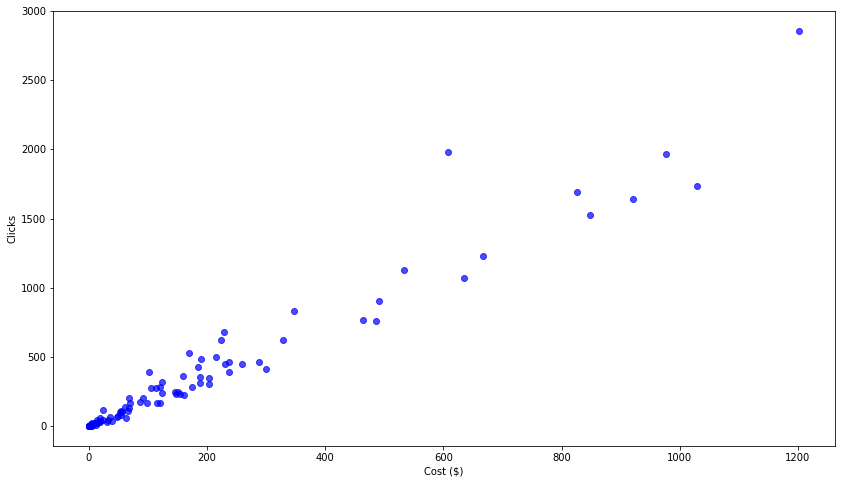

In [64]:
#sb.lmplot('cost', 'clicks', data=top_ad_groups, fit_reg=False, scatter_kws={"marker": "D", "s": 20}) 
plt.figure(figsize=(14,8))
plt.scatter(top_ad_groups['cost'],top_ad_groups['clicks'], label='Actual Data', color='b', alpha=.7)

plt.xlabel('Cost ($)')
plt.ylabel('Clicks')
plt.show()

### Linear Regression
Run a linear regression model on the dataset to generate the regression line to perform predictions for clicks based on campaign cost.

In [7]:
x = top_ad_groups['cost']
y = top_ad_groups['clicks']

In [21]:
# Create test and training set for LR model
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

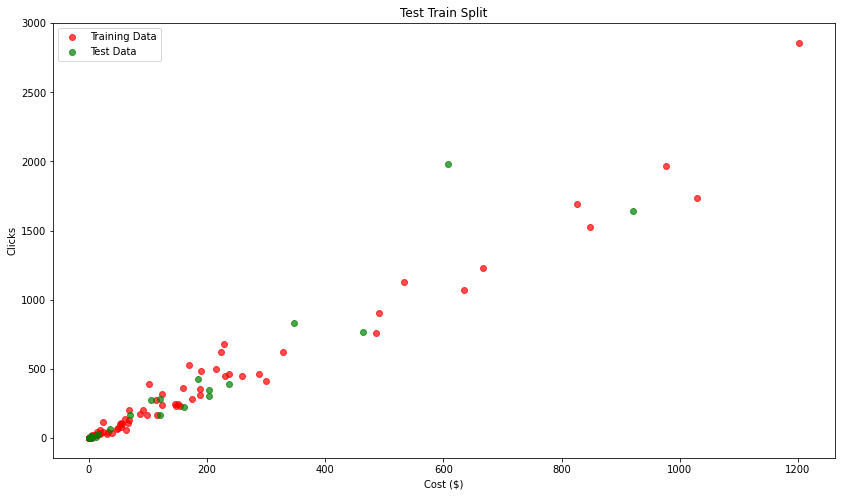

In [61]:
plt.figure(figsize=(14,8))
plt.scatter(X_train, y_train, label='Training Data', color='r', alpha=.7) 
plt.scatter(X_test, y_test, label='Test Data', color='g', alpha=.7) 

plt.title("Test Train Split")
plt.xlabel('Cost ($)')
plt.ylabel('Clicks')
plt.legend()
plt.show()

In [26]:
# Linear Regression Model
lr = LinearRegression()

lr_fit = lr.fit(X_train.values.reshape(-1, 1), y_train)
lr_predict = lr_fit.predict(X_test.values.reshape(-1, 1)) #predictions

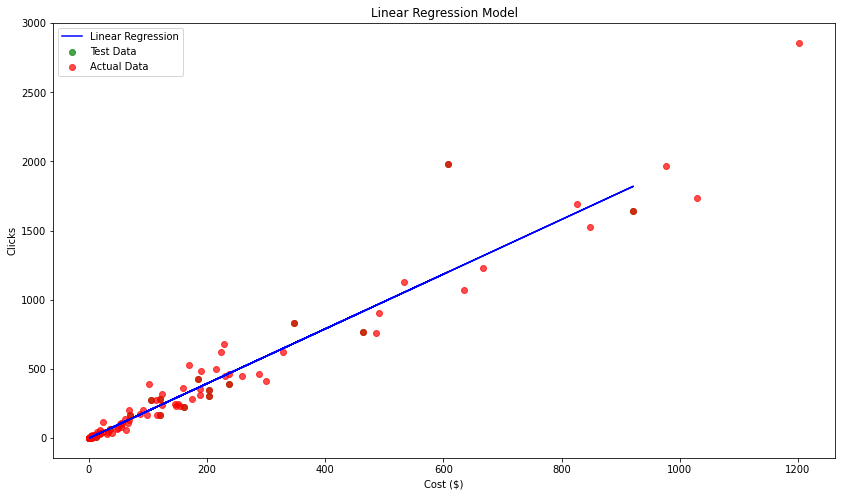

In [59]:
# Graph Line
plt.figure(figsize=(14,8))
plt.plot(X_test, lr_predict, label='Linear Regression', color='b') 
plt.scatter(X_test, y_test, label='Test Data', color='g', alpha=.7)
plt.scatter(top_ad_groups['cost'],top_ad_groups['clicks'], label='Actual Data', color='r', alpha=.7)
plt.legend()
plt.title("Linear Regression Model")
plt.xlabel('Cost ($)')
plt.ylabel('Clicks')
plt.show()

In [65]:
r2 = lr.score(X_test.values.reshape(-1, 1), y_test.values)
print("Accuracy: ", r2*100, "%")


Accuracy:  86.82934349394553 %


In [68]:
# Predict campaign clicks with a campaign cost of $400
camp_cost = 400
proj_clicks = lr.predict(np.array([[400]]))[0]

print("Campaign Cost: $", camp_cost)
print("Projected Clicks: ", proj_clicks)

Campaign Cost: $ 400
Projected Clicks:  789.4752417400196


## Conclusion
This model is a simple machine learning algorithm that predicts the amount of clicks that can be expected from a campaign at a certain cost for the top ad groups (Topics - Motorsport Fanatics, Topics - Offroad & Auto Enthusiasts, KW - Adventure Seekers, KW - Motorsport Fanatics, KW - Adventurers). This model can be adapted across many other metrics including pricing max bid to generate clicks, conversions, and more. The next steps would be to utilize more historic data as well as including more metrics in the data to further forecast and also researching what other machine algorithms could be implemented on the data set to optimize campaigns.
